In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import seaborn as sns
%matplotlib inline

In [2]:
yields=pd.read_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 3\\yield_ndvi_weather.csv")

In [3]:
yields

,Year,Precipitation (mm),Max Temperature (C),Min Temperature (C),Average Temperature (C),Specific Humidity 2m (kg kg-1),Relative Humidity 2m (%),Surface Pressure (K Pa),Dew Point (C),Min Wind Speed (m/s),Max Wind Speed (m/s),Cloud Coverage,NDVI,Yield (Tonnes/Hectre)
0,2000,23.717500,34.155052,22.433594,11.721302,16.525469,72.209010,99.975052,21.734583,0.581927,9.280677,0.665625,0.463595,3.29
1,2001,23.980625,34.302917,23.041354,11.261563,16.725625,72.635365,100.028698,21.918750,0.855365,8.819948,0.668854,0.468224,3.48
2,2002,14.430625,34.705677,23.065417,11.640208,16.665729,71.516094,100.088802,21.871146,0.726146,9.027656,0.671146,0.452172,2.93
3,2003,21.478750,34.229271,23.322917,10.906510,16.888854,72.642604,100.091615,22.092188,0.862656,8.643802,0.669063,0.457941,1.85
4,2004,33.480625,33.620625,22.659948,10.960313,16.775885,74.648073,100.103281,21.959115,0.878958,9.013385,0.672708,0.470164,2.27
5,2005,38.160625,33.948177,23.152865,10.795208,17.185729,74.475313,100.054896,22.392656,0.679271,9.302344,0.666458,0.499863,2.21
6,2006,17.530625,33.915573,22.807969,11.106615,16.756771,73.788906,100.095938,21.991510,0.715938,8.678125,0.668542,0.486386,1.96
7,2007,21.882500,34.019271,22.837656,11.181510,16.612917,72.706667,100.050729,21.818333,0.685677,9.132604,0.666250,0.489340,3.55
8,2008,30.049375,33.633854,22.404688,11.228906,16.859010,74.746927,100.030208,22.089219,0.831250,9.135260,0.662708,0.502346,2.54
9,2009,16.677500,34.650625,23.313698,11.336875,16.524062,71.096146,100.053385,21.711510,0.727396,9.311823,0.663958,0.468646,1.92


In [4]:
yields.shape

(20, 14)

In [5]:
yields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            20 non-null     int64  
 1   Precipitation (mm)              20 non-null     float64
 2   Max Temperature (C)             20 non-null     float64
 3   Min Temperature (C)             20 non-null     float64
 4   Average Temperature (C)         20 non-null     float64
 5   Specific Humidity 2m (kg kg-1)  20 non-null     float64
 6   Relative Humidity 2m (%)        20 non-null     float64
 7   Surface Pressure (K Pa)         20 non-null     float64
 8   Dew Point (C)                   20 non-null     float64
 9   Min Wind Speed (m/s)            20 non-null     float64
 10  Max Wind Speed (m/s)            20 non-null     float64
 11  Cloud Coverage                  20 non-null     float64
 12  NDVI                            20 non

In [6]:
corr_matrix=yields.corr()
corr_matrix

,Year,Precipitation (mm),Max Temperature (C),Min Temperature (C),Average Temperature (C),Specific Humidity 2m (kg kg-1),Relative Humidity 2m (%),Surface Pressure (K Pa),Dew Point (C),Min Wind Speed (m/s),Max Wind Speed (m/s),Cloud Coverage,NDVI,Yield (Tonnes/Hectre)
Year,1.000000,0.055321,0.157897,0.500438,-0.306931,0.234008,-0.247387,0.423056,0.205673,-0.176685,-0.357488,-0.759011,0.388579,0.340253
Precipitation (mm),0.055321,1.000000,-0.663348,0.018557,-0.723928,0.740457,0.732586,0.073721,0.736267,-0.220846,-0.104062,0.107028,0.503646,0.039902
Max Temperature (C),0.157897,-0.663348,1.000000,0.511909,0.579145,-0.339946,-0.841910,0.084634,-0.370444,0.053280,-0.012647,-0.143325,-0.476845,0.162520
Min Temperature (C),0.500438,0.018557,0.511909,1.000000,-0.403840,0.342798,-0.395215,0.495967,0.293050,0.089016,-0.378324,-0.129078,-0.208491,0.109238
Average Temperature (C),-0.306931,-0.723928,0.579145,-0.403840,1.000000,-0.687417,-0.521622,-0.380916,-0.672670,-0.027867,0.345858,-0.030088,-0.309853,0.069376
Specific Humidity 2m (kg kg-1),0.234008,0.740457,-0.339946,0.342798,-0.687417,1.000000,0.643725,0.331932,0.995807,-0.164608,-0.486502,0.068104,0.465452,0.000330
Relative Humidity 2m (%),-0.247387,0.732586,-0.841910,-0.395215,-0.521622,0.643725,1.000000,0.022922,0.675454,-0.025006,-0.127295,0.346892,0.484075,-0.157851
Surface Pressure (K Pa),0.423056,0.073721,0.084634,0.495967,-0.380916,0.331932,0.022922,1.000000,0.319449,0.264486,-0.586256,0.083306,-0.038029,0.236079
Dew Point (C),0.205673,0.736267,-0.370444,0.293050,-0.672670,0.995807,0.675454,0.319449,1.000000,-0.158123,-0.482361,0.083233,0.490367,-0.000881
Min Wind Speed (m/s),-0.176685,-0.220846,0.053280,0.089016,-0.027867,-0.164608,-0.025006,0.264486,-0.158123,1.000000,0.023022,0.283150,-0.596284,0.006698


In [7]:
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True

c:\Users\C KIRANMAYI\anaconda3\envs\myenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


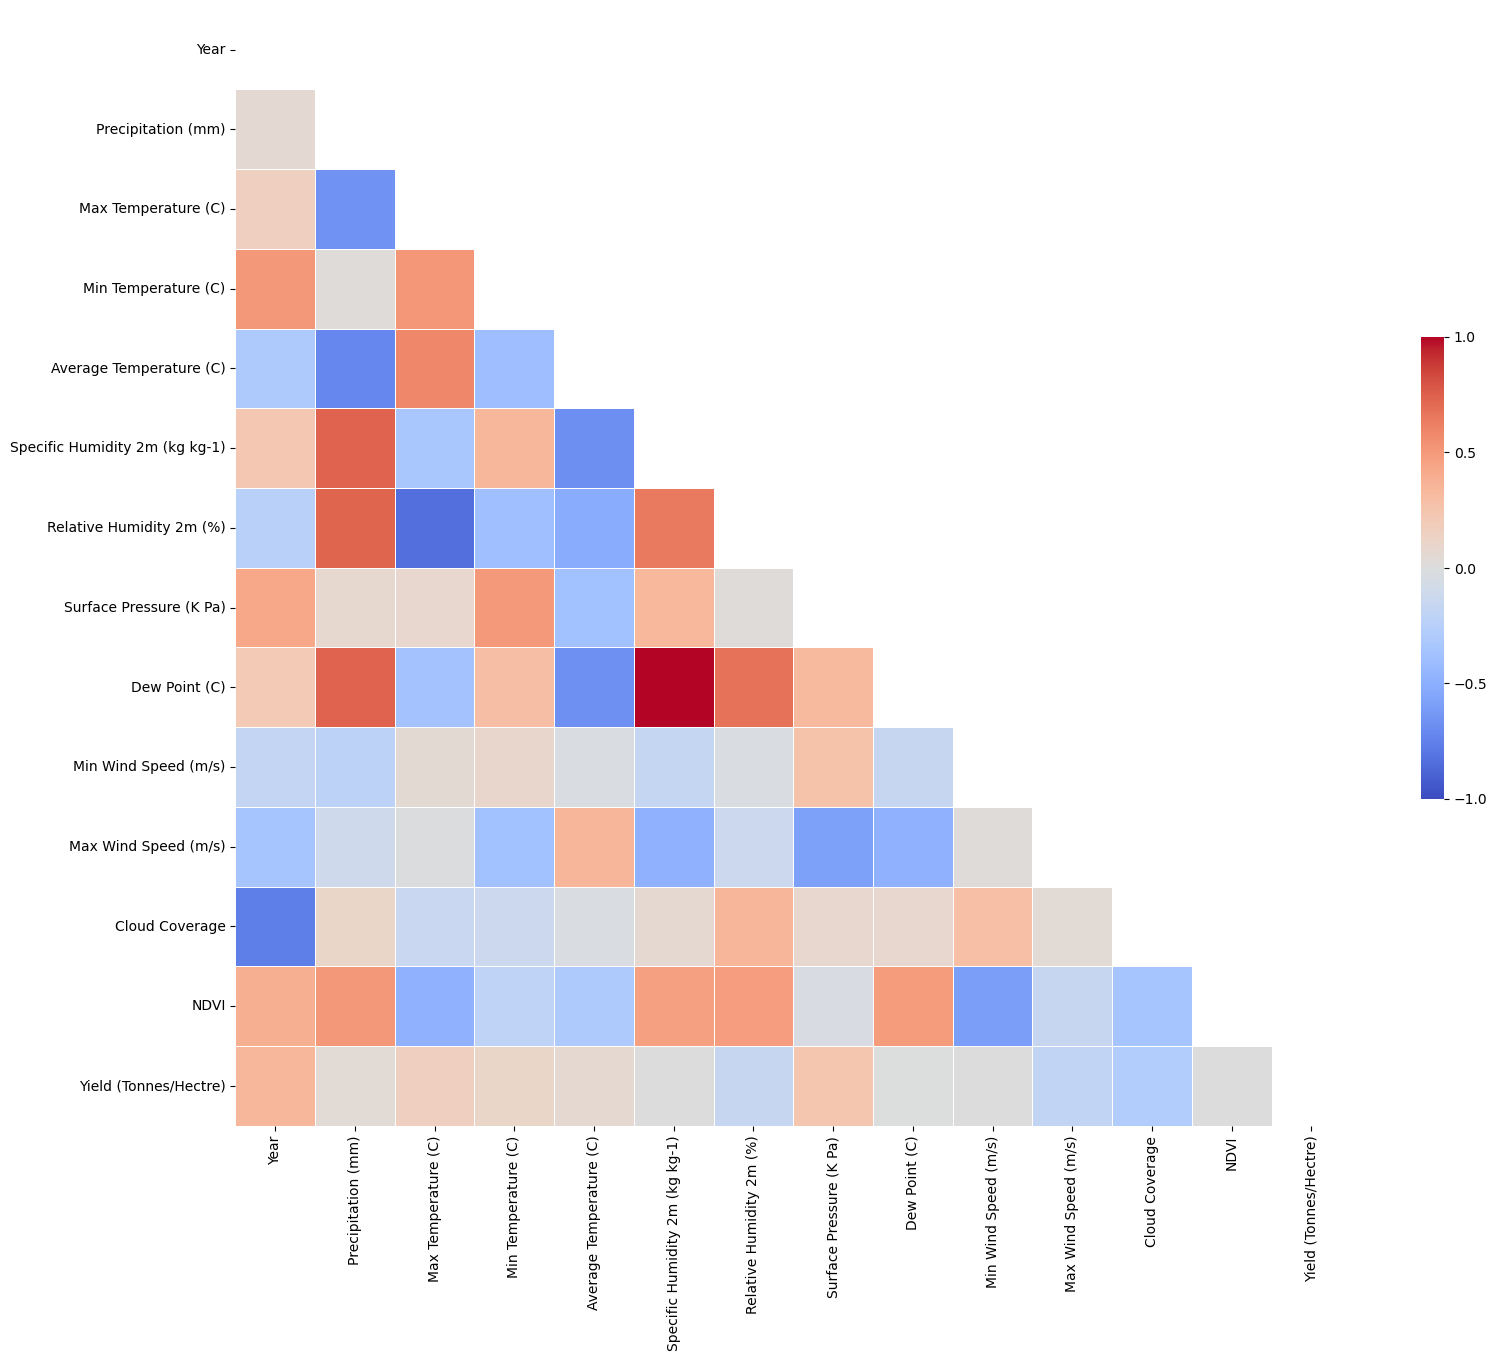

In [8]:
f, ax = plt.subplots(figsize=(18, 15)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(yields)


In [10]:
X = []
y = []

for i in range(0, len(scaled_features)):
    X.append(scaled_features[i:i+1, :-1])
    y.append(scaled_features[i, -1])

In [11]:
X, y = np.array(X), np.array(y)

In [12]:
X.shape

(20, 1, 13)

In [13]:
X

array([[[0.        , 0.39450671, 0.36560153, 0.01913067, 0.83582089,
         0.00194482, 0.42664172, 0.        , 0.0314385 , 0.31287619,
         0.95548277, 0.61797753, 0.18848994]],

       [[0.05263158, 0.40487745, 0.46474594, 0.42135742, 0.50890708,
         0.27875819, 0.52296234, 0.27792763, 0.28237882, 0.93249144,
         0.29695526, 0.79213486, 0.26487466]],

       [[0.10526316, 0.02847641, 0.73480007, 0.43728241, 0.77815636,
         0.19592308, 0.27010013, 0.58931477, 0.21751472, 0.63967898,
         0.59383608, 0.91573033, 0.        ]],

       [[0.15789474, 0.30626924, 0.41536581, 0.60770053, 0.25643495,
         0.50450191, 0.52459788, 0.60388574, 0.51869987, 0.94901452,
         0.04518722, 0.8033708 , 0.09519263]],

       [[0.21052632, 0.7793078 , 0.00726384, 0.16893592, 0.29469279,
         0.34826767, 0.97766717, 0.66432844, 0.33737846, 0.98595539,
         0.57343855, 1.        , 0.29687985]],

       [[0.26315789, 0.96376401, 0.22689016, 0.49515701, 0.17728973,
 

In [14]:
y

array([0.59751037, 0.67634855, 0.44813278, 0.        , 0.17427386,
       0.14937759, 0.04564315, 0.70539419, 0.28630705, 0.02904564,
       0.39834025, 0.26141079, 0.75103734, 0.1659751 , 1.        ,
       0.97925311, 0.60165975, 0.15352697, 0.72614108, 0.71369295])

In [15]:
y.shape

(20,)

In [16]:
# Split the data into training and testing sets (90% training, 10% testing)
train_size = int(0.9 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [17]:
# # Reshape X_train and X_test for GRU, LSTM, and RNN input (samples, timesteps, features)
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
# Reshape X_train and X_test for GRU, LSTM, and RNN input (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

### GRU(Gated Recurrent Unit)

In [18]:
def create_gru_model(units=64):
    # model = Sequential()
    # model.add(GRU(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    # model.add(Dense(1))
    # model.compile(optimizer=Adam(), loss='mse')
    # return model
    model = Sequential()
    model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))  # Adding a dropout layer
    model.add(GRU(units=64, return_sequences=False))
    model.add(Dropout(0.2))  # Another dropout layer
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model


In [19]:
gru_model = KerasRegressor(build_fn=create_gru_model, verbose=1)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_16252\3748809474.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  gru_model = KerasRegressor(build_fn=create_gru_model, verbose=1)


In [20]:
# Define the hyperparameter grid
gru_param_grid = {
'units': [4, 8 , 16],
    'batch_size': [4, 8 ],
    'epochs': [50, 100]
}


In [21]:
gru_grid = GridSearchCV(estimator=gru_model, param_grid=gru_param_grid, cv=3, scoring='neg_mean_squared_error')

In [22]:
gru_grid_result = gru_grid.fit(X_train, y_train)

Epoch 1/50
3/3 [==============================] - 5s 12ms/step - loss: 0.3129
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 0.2155
Epoch 3/50
3/3 [==============================] - 0s 6ms/step - loss: 0.1475
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 0.1216
Epoch 5/50
3/3 [==============================] - 0s 9ms/step - loss: 0.1044
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 0.1137
Epoch 7/50
3/3 [==============================] - 0s 9ms/step - loss: 0.0893
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1273
Epoch 9/50
3/3 [==============================] - 0s 8ms/step - loss: 0.1190
Epoch 10/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0996
Epoch 11/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1254
Epoch 12/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0917
Epoch 13/50
3/3 [==============================] - 0s 8ms/step - loss: 0

In [23]:
print(f"Best GRU params: {gru_grid_result.best_params_}")
print(f"Best GRU score: {gru_grid_result.best_score_}")

Best GRU params: {'batch_size': 8, 'epochs': 50, 'units': 8}
Best GRU score: -0.1759901690654401


### LSTM(Long Short Term Memory)

In [24]:
def create_lstm_model(units=64):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [25]:
lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_16252\1916978622.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)


In [26]:
# Define the hyperparameter grid
lstm_param_grid = {
   'units': [4, 8 , 16],
    'batch_size': [4, 8 ],
    'epochs': [50, 100]
}


In [27]:
lstm_grid = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv=3, scoring='neg_mean_squared_error')

In [28]:
lstm_grid_result = lstm_grid.fit(X_train, y_train)

In [29]:
print(f"Best LSTM params: {lstm_grid_result.best_params_}")
print(f"Best LSTM score: {lstm_grid_result.best_score_}")

Best LSTM params: {'batch_size': 4, 'epochs': 50, 'units': 4}
Best LSTM score: -0.1224409242278262


### RNN (Recurrent Neural Network)

In [30]:
def create_rnn_model(units=64):
    model = Sequential()
    model.add(SimpleRNN(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [31]:
rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_16252\361697586.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)


In [32]:
rnn_param_grid = {
   'units': [4, 8 , 16],
    'batch_size': [4, 8 ],
    'epochs': [50, 100]
}

In [33]:
rnn_grid = GridSearchCV(estimator=rnn_model, param_grid=rnn_param_grid, cv=3, scoring='neg_mean_squared_error')

In [34]:
rnn_grid_result = rnn_grid.fit(X_train, y_train)

In [35]:
print(f"Best SimpleRNN params: {rnn_grid_result.best_params_}")
print(f"Best SimpleRNN score: {rnn_grid_result.best_score_}")

Best SimpleRNN params: {'batch_size': 8, 'epochs': 100, 'units': 16}
Best SimpleRNN score: -0.13236104358426834


In [36]:
# Evaluating GRU model on test data
best_gru_model = gru_grid_result.best_estimator_
y_pred_gru = best_gru_model.predict(X_test)
mse_gru = mean_squared_error(y_test, y_pred_gru)

print(f"GRU Model - MSE: {mse_gru}")

# Evaluating LSTM model on test data
best_lstm_model = lstm_grid_result.best_estimator_
y_pred_lstm = best_lstm_model.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)


print(f"LSTM Model - MSE: {mse_lstm}")

# Evaluating SimpleRNN model on test data
best_rnn_model = rnn_grid_result.best_estimator_
y_pred_rnn = best_rnn_model.predict(X_test)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)


print(f"SimpleRNN Model - MSE: {mse_rnn}")


1/1 [==============================] - 1s 1s/step
GRU Model - MSE: 0.04184146354951975
LSTM Model - MSE: 0.07572826517974954
SimpleRNN Model - MSE: 0.03645430136891087


## LSTM is sutaible for yield with MSE of 0.055

In [54]:
Phase2_output=pd.read_excel("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 3\\2020_weather_ndvi1.xlsx")


In [55]:
Phase2_output

,Year,Precipitation (mm),Max Temperature (C),Min Temperature (C),Average Temperature (C),Specific Humidity 2m (kg kg-1),Relative Humidity 2m (%),Surface Pressure (K Pa),Dew Point (C),Min Wind Speed (m/s),Max Wind Speed (m/s),Cloud Coverage,NDVI
0,2020,39.763353,34.274792,23.736136,10.626913,17.017442,73.419835,100.079251,22.352593,1.082176,8.836086,0.660004,0.528239


In [56]:
Phase2_output_pred=[]

In [57]:
# yields=yields.drop(['Yield (Tonnes/Hectre)'],axis=1)
features = yields.drop('Yield (Tonnes/Hectre)', axis=1)
target = yields[['Yield (Tonnes/Hectre)']]


In [58]:

# Scale features and target separately
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

scaled_features = feature_scaler.fit(features)
scaledtest_data = scaled_features.transform(Phase2_output)
scaled_target = target_scaler.fit(target)

In [59]:
# # scaler = MinMaxScaler(feature_range=(0, 1))
# scaler.fit(yields)
# scaledtest_data = scaler.transform(Phase2_output)

In [60]:
scaledtest_data

array([[1.05263158, 1.02693348, 0.44588795, 0.88117627, 0.05761742,
        0.68233747, 0.70018748, 0.53983427, 0.87352153, 1.44645022,
        0.32002234, 0.31480575, 1.25519099]])

In [61]:
X_test = []
for i in range(0, len(scaledtest_data)):
    X_test.append(scaledtest_data[i:i+1, :])  # 12 months history

In [62]:
X_test = np.array(X_test)

In [63]:
X_test 

array([[[1.05263158, 1.02693348, 0.44588795, 0.88117627, 0.05761742,
         0.68233747, 0.70018748, 0.53983427, 0.87352153, 1.44645022,
         0.32002234, 0.31480575, 1.25519099]]])

In [64]:
print("Shape of X_test before reshaping:", X_test.shape)

Shape of X_test before reshaping: (1, 1, 13)


In [65]:
# Reshape X_test for prediction
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))


In [66]:
X_test.shape

(1, 1, 13)

In [67]:

best_model = rnn_grid_result.best_estimator_
Phase2_output_pred=best_model.predict(X_test)

In [68]:
Phase2_output_pred

array(0.6236278, dtype=float32)

In [69]:
y_pred_original = target_scaler.inverse_transform(Phase2_output_pred.reshape(-1, 1))


In [70]:
print(y_pred_original[0][0])

3.352943
